In [50]:
import sys
import os
import subprocess
from math import *
import numpy as np
from datetime import *
from pylab import *
import matplotlib as mpl
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
from astropy.table import Table, Column 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import scipy.misc as scimisc
import random
from datetime import datetime
import json

# from google.colab import drive
# drive.mount('/content/drive')

In [51]:
!pip install imgaug

import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib


In [52]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa


ia.seed(1)

seq = iaa.Sequential([

    iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.1))),
    iaa.GammaContrast(gamma=(0.97,1.03)),
    iaa.AdditiveGaussianNoise(0,3),
    iaa.Affine(rotate=(0, 360))
], random_order=True)

In [75]:
data = np.load('/content/drive/My Drive/data_128x128.npz')
images_ = data['images'].astype(np.uint8)
labels_ = data['labels'] 
data.close() 

In [54]:
# from sklearn.model_selection import train_test_split

# ix, = np.where(labels_[1]>45)

# images_c = images_[ix]
# labels_c = labels_[1][ix]
# pgcIDs_c = labels_[0][ix]

# images_train, images_test, labels_train, labels_test, pgcIDs_train,  pgcIDs_test = train_test_split(images_c, labels_c, pgcIDs_c, test_size=0.40)

# notUnique = np.isin(pgcIDs_test, pgcIDs_train)
# Unique = np.logical_not(notUnique)

# images_train = np.concatenate((images_train, images_test[notUnique]))
# labels_train  = np.concatenate((labels_train, labels_test[notUnique]))
# pgcIDs_train = np.concatenate((pgcIDs_train, pgcIDs_test[notUnique]))

# images_test = images_test[Unique]
# labels_test = labels_test[Unique]
# pgcIDs_test = pgcIDs_test[Unique]


In [55]:
# import copy 
# t1 = datetime.now()

# np.savez_compressed('/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_000.npz', images=images_train, labels=labels_train, pgcIDs=pgcIDs_train)
# np.savez_compressed('/content/drive/My Drive/Colab Notebooks/data_128x128_testaug_000.npz', images=images_test, labels=labels_test, pgcIDs=pgcIDs_test)


# for j in range(15):

#   # images_train_aug = copy.deepcopy(images_train)
#   # labels_train_aug = copy.deepcopy(labels_train)
#   # pgcIDs_train_aug = copy.deepcopy(pgcIDs_train)

#   # images_test_aug = copy.deepcopy(images_test)
#   # labels_test_aug = copy.deepcopy(labels_test)
#   # pgcIDs_test_aug = copy.deepcopy(pgcIDs_test)


#   for i in range(1):
    
#     dataAug = seq(images=images_train)
#     images_train_aug = dataAug # np.concatenate((images_train_aug, dataAug)) 
#     labels_train_aug = labels_train # np.concatenate((labels_train_aug, labels_train)) 
#     pgcIDs_train_aug = pgcIDs_train # np.concatenate((pgcIDs_train_aug, pgcIDs_train)) 

#     dataAug = seq(images=images_test)
#     images_test_aug = dataAug # np.concatenate((images_test_aug, dataAug)) 
#     labels_test_aug = labels_test # np.concatenate((labels_test_aug, labels_test)) 
#     pgcIDs_test_aug = pgcIDs_test # np.concatenate((pgcIDs_test_aug, pgcIDs_test)) 


#     t2 =  datetime.now()
#     print("Execution time: ", i, t2-t1)

#   np.savez_compressed('/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_'+str(j)+'.npz', images=images_train_aug, labels=labels_train_aug, pgcIDs=pgcIDs_train_aug)
#   np.savez_compressed('/content/drive/My Drive/Colab Notebooks/data_128x128_testaug_'+str(j)+'.npz', images=images_test_aug, labels=labels_test_aug, pgcIDs=pgcIDs_test_aug)
#   print('save #', j)

In [56]:
!ls /content/drive/My\ Drive/Colab\ Notebooks/data_128x128_train*.npz

'/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_000.npz'
'/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_0.npz'
'/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_10.npz'
'/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_11.npz'
'/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_12.npz'
'/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_13.npz'
'/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_14.npz'
'/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_1.npz'
'/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_2.npz'
'/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_3.npz'
'/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_4.npz'
'/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_5.npz'
'/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_6.npz'
'/content/drive/My Drive/Colab Notebooks/data_128x128_trainaug_7.npz'
'/content/dri

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import numpy as np
def vgg6(input_shape=(128, 128, 3)):


    model = tf.keras.models.Sequential(name='VGG6')

    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape, name='conv1'))
    model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', name='conv2'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv3'))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv4'))
    model.add(tf.keras.layers.BatchNormalization(axis = 3, name = 'bn_2'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(4, 4)))
    model.add(tf.keras.layers.Dropout(0.25))

    ## Fully connected layers
    model.add(tf.keras.layers.Flatten())

    # model.add(tf.keras.layers.Dense(256, activation='relu', name='fc_1'))
    # model.add(tf.keras.layers.Dropout(0.25))
    
    model.add(tf.keras.layers.Dense(256, activation='relu', name='fc_2'))
    # model.add(tf.keras.layers.Dropout(0.25))
    
    # model.add(tf.keras.layers.Dense(64, activation='relu', name='fc_3'))
    model.add(tf.keras.layers.Dense(32, activation='relu', name='fc_4'))

    model.add(tf.keras.layers.Dense(8, activation='relu', name='fc_5'))
    # output layer
    model.add(tf.keras.layers.Dense(1, name='fc_out1'))
    model.add(tf.keras.layers.Dense(1, name='fc_out2'))

    return model

In [58]:
def esn_shuffle(array, seed=0):
        np.random.seed(seed)
        np.random.shuffle(array)
        return array

In [59]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)

In [60]:
batches = esn_shuffle(np.arange(15), seed=0)

for i in range(1,10):
  batches = np.concatenate((batches, esn_shuffle(np.arange(15), seed=1))) 

batches

array([ 1,  6,  8,  9, 14,  4,  2, 13, 10,  7, 11,  3,  0,  5, 12,  3,  7,
        6,  2, 10,  4,  1, 13,  0, 14,  9,  8, 12, 11,  5,  3,  7,  6,  2,
       10,  4,  1, 13,  0, 14,  9,  8, 12, 11,  5,  3,  7,  6,  2, 10,  4,
        1, 13,  0, 14,  9,  8, 12, 11,  5,  3,  7,  6,  2, 10,  4,  1, 13,
        0, 14,  9,  8, 12, 11,  5,  3,  7,  6,  2, 10,  4,  1, 13,  0, 14,
        9,  8, 12, 11,  5,  3,  7,  6,  2, 10,  4,  1, 13,  0, 14,  9,  8,
       12, 11,  5,  3,  7,  6,  2, 10,  4,  1, 13,  0, 14,  9,  8, 12, 11,
        5,  3,  7,  6,  2, 10,  4,  1, 13,  0, 14,  9,  8, 12, 11,  5,  3,
        7,  6,  2, 10,  4,  1, 13,  0, 14,  9,  8, 12, 11,  5])

In [61]:
file_dir = '/content/drive/My Drive/Colab Notebooks/'

def trainer(iter, batches):

  batchNo = batches[iter]
  if True: 

    vgg_model = vgg6()
    vgg_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=['mse', 'mae'])

    if iter>0:

      vgg_model = vgg6()
      vgg_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(), metrics=['mse', 'mae'])
      vgg_model.load_weights(file_dir+str(iter-1)+".ckpt")
      with open(file_dir+'evalDict.json') as json_file:
        evalDict = json.load(json_file)
    else:
      evalDict = {}


    print(iter, batchNo)


    data = np.load('/content/drive/My Drive/Colab Notebooks/data_128x128_testaug_13.npz')
    images_test_aug = data['images'].astype(np.uint8)
    labels_test_aug = data['labels']
    pgcIDs_test_aug = data['pgcIDs']
    data.close() 
    del data

    batchFile = 'data_128x128_trainaug_'+str(batchNo)+'.npz'

    data = np.load(file_dir+batchFile)
    images_train_aug = data['images'].astype(np.uint8)
    labels_train_aug = data['labels']
    pgcIDs_train_aug = data['pgcIDs']
    data.close() 
    del data

    n_epochs=1
    vgg_model.fit(images_train_aug, labels_train_aug, 
                                      epochs=n_epochs, batch_size=128, 
                                      validation_data=(images_test_aug, labels_test_aug),
                                      verbose=1, shuffle=True)
    evalDict[iter] = {} 
    for key in vgg_model.history.history:
      evalDict[iter][key] = vgg_model.history.history[key][0]
    evalDict[iter]["batchNo"] = batchNo
    evalDict[iter]["batchFile"] = batchFile
    
    with open(file_dir+"evalDict.json", "w", encoding ='utf8') as outfile:
      json.dump(evalDict, outfile, allow_nan=True, cls=NpEncoder)
    
    vgg_model.save_weights(file_dir+str(iter)+".ckpt")

    del vgg_model
    tf.keras.backend.clear_session()
    del images_train_aug 
    del labels_train_aug
    del pgcIDs_train_aug
    del images_test_aug 
    del labels_test_aug
    del pgcIDs_test_aug

    return evalDict




In [49]:
for i in range(100, 150):
  trainer(i, batches)

100 9
336/336 [==============================] - 12s 32ms/step - loss: 9.2352 - mse: 9.2352 - mae: 2.1770 - val_loss: 9.9434 - val_mse: 9.9434 - val_mae: 2.2037
101 8
336/336 [==============================] - 11s 32ms/step - loss: 8.8610 - mse: 8.8610 - mae: 2.1345 - val_loss: 11.8444 - val_mse: 11.8444 - val_mae: 2.6667
102 12
336/336 [==============================] - 11s 32ms/step - loss: 9.2885 - mse: 9.2885 - mae: 2.1842 - val_loss: 9.5186 - val_mse: 9.5186 - val_mae: 2.1623
103 11
336/336 [==============================] - 11s 32ms/step - loss: 8.9285 - mse: 8.9285 - mae: 2.1470 - val_loss: 8.2450 - val_mse: 8.2450 - val_mae: 2.0752
104 5
336/336 [==============================] - 12s 32ms/step - loss: 8.8588 - mse: 8.8588 - mae: 2.1281 - val_loss: 9.6141 - val_mse: 9.6141 - val_mae: 2.1690
105 3
336/336 [==============================] - 12s 33ms/step - loss: 8.9190 - mse: 8.9190 - mae: 2.1454 - val_loss: 8.4419 - val_mse: 8.4419 - val_mae: 2.0905
106 7
336/336 [===============

In [71]:
with open(file_dir+'evalDict.json') as json_file:
        evalDict = json.load(json_file)

df =  pd.DataFrame.from_dict(evalDict).T   

df.head()

,loss,mse,mae,val_loss,val_mse,val_mae,batchNo,batchFile
0,96.1912,96.1912,6.7291,1526.32,1526.32,37.7311,1,data_128x128_trainaug_1.npz
1,40.9207,40.9207,4.82279,273.952,273.952,12.7243,6,data_128x128_trainaug_6.npz
2,33.6052,33.6052,4.33917,294.869,294.869,13.8552,8,data_128x128_trainaug_8.npz
3,29.0244,29.0244,3.99264,284.154,284.154,14.2752,9,data_128x128_trainaug_9.npz
4,31.6121,31.6121,4.22113,187.805,187.805,11.677,14,data_128x128_trainaug_14.npz


(0.0, 30.0)

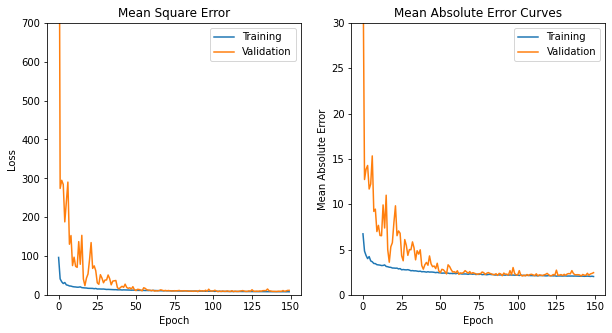

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

epochs = np.arange(len(df))

ax[0].plot(epochs, df.mse.values, label='Training')
ax[0].plot(epochs, df.val_mse, label='Validation')
ax[0].set_title('Mean Square Error')
ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_ylim(0, 700)

ax[1].plot(epochs, df.mae.values, label='Training')
ax[1].plot(epochs, df.val_mae, label='Validation')
ax[1].set_title('Mean Absolute Error Curves')
ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Mean Absolute Error')
ax[1].set_ylim(0, 30)

In [62]:
data = np.load('/content/drive/My Drive/Colab Notebooks/data_128x128_testaug_5.npz')
images_test_aug = data['images'].astype(np.uint8)
labels_test_aug = data['labels']
pgcIDs_test_aug = data['pgcIDs']
data.close() 
del data

vgg_model = vgg6()
vgg_model.load_weights(file_dir+"149.ckpt")

inc_p = vgg_model.predict(images_test_aug)
inc_m = labels_test_aug


N = images_test_aug.shape[0]
inc_p = inc_p.reshape(N)

Raw RMS:  3.2848221169163216
Adjusted RMS:  3.019721813918582


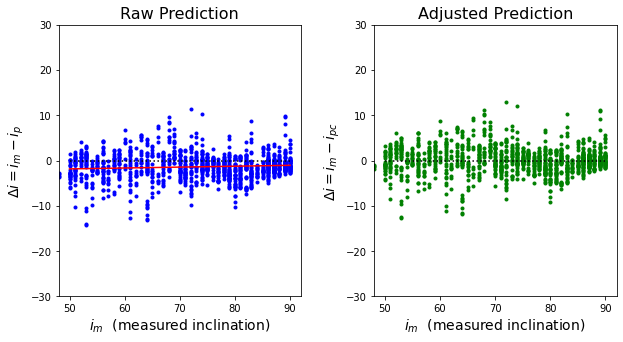

In [63]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5)) 

d = inc_m-inc_p

m, b = np.polyfit(inc_m, d, 1)
x = np.linspace(50,90,20)
y  = m*x+b

ax[0].plot(inc_m, d, 'b.')
ax[0].plot([50,90],[0,0], 'k:')
ax[0].plot(x, y, 'r-')
ax[0].set_xlim(48,92)
ax[0].set_ylim(-30 ,30)
ax[0].set_title('Raw Prediction', fontsize=16)
ax[0].set_xlabel(r'$i_m$'+'  (measured inclination)', fontsize=14)
ax[0].set_ylabel(r'$\Delta i = i_m-i_p$', fontsize=14)

print("Raw RMS: ", np.sqrt(np.mean((d)**2)))


d_ = inc_m-(inc_p+b)/(1.-m)
ax[1].plot(inc_m, d_, 'g.')
ax[1].plot([50,90],[0,0], 'k:')
ax[1].set_xlim(48,92)
ax[1].set_ylim(-30,30)

print("Adjusted RMS: ", np.sqrt(np.mean((d_)**2)))
ax[1].set_title('Adjusted Prediction', fontsize=16)
ax[1].set_xlabel(r'$i_m$'+'  (measured inclination)', fontsize=14)
ax[1].set_ylabel(r'$\Delta i = i_m-i_{pc}$', fontsize=14)

plt.subplots_adjust( wspace=0.3)

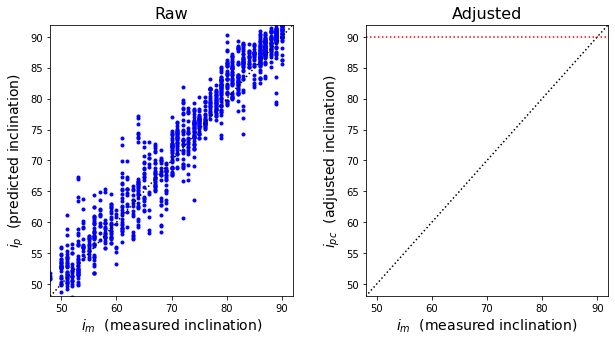

In [67]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5)) 

ax[0].plot(inc_m, inc_p, 'b.')
ax[0].plot([48,92],[48,92], 'k:')
ax[0].set_xlim(48,92)
ax[0].set_ylim(48,92)
ax[0].set_title('Raw', fontsize=16)
ax[0].set_xlabel(r'$i_m$'+'  (measured inclination)', fontsize=14)
ax[0].set_ylabel(r'$i_p$'+'  (predicted inclination)', fontsize=14)

ax[1].plot(inc_m, (inc_p+b)/(1.-m), 'g.')
ax[1].plot([48,92],[48,92], 'k:')
ax[1].set_xlim(48,92)
ax[1].set_ylim(48,92)
ax[1].plot([48,92],[90,90], 'r:')
ax[1].set_title('Adjusted', fontsize=16)
ax[1].set_xlabel(r'$i_m$'+'  (measured inclination)', fontsize=14)
ax[1].set_ylabel(r'$i_{pc}$'+'  (adjusted inclination)', fontsize=14)

plt.subplots_adjust( wspace=0.3)

In [68]:
images_test_aug[0,:,:].shape

(128, 128, 3)

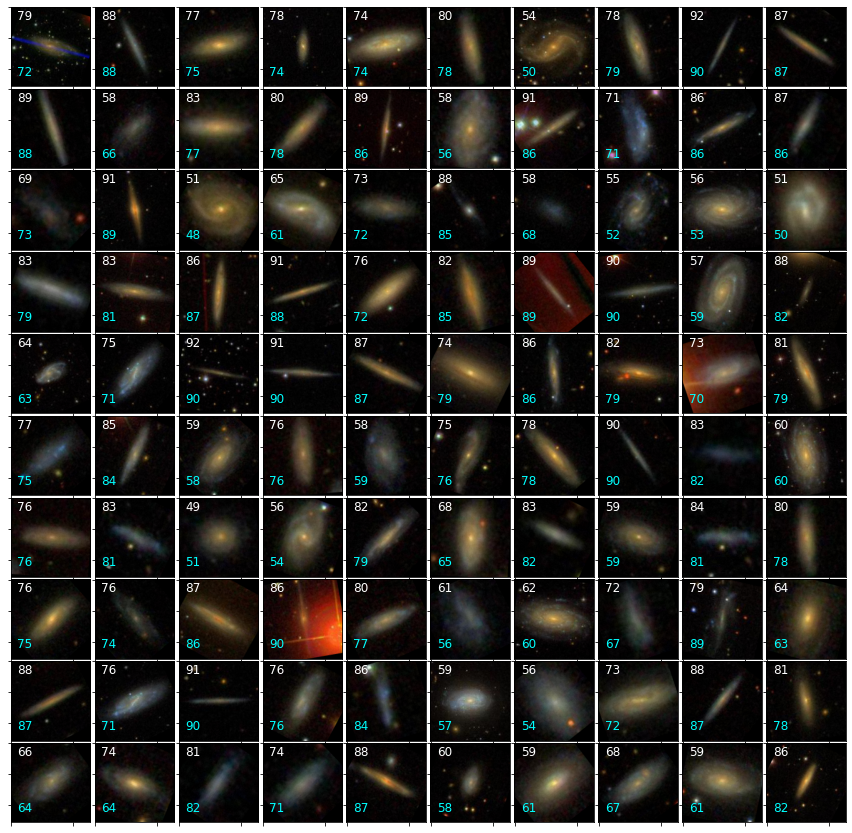

In [69]:
n = 10
m = 10

fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15,15)) 

t = 0 
for i in range(n):
  for j in range(m):

    ax = axes[i][j]
    ax.imshow(images_test_aug[t,:,:])
    
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)

    ax.text(10, 20, np.int(np.round(inc_p[t])), color='white', fontsize=12)
    ax.text(10, 110, np.int(np.round(inc_m[t])), color='cyan', fontsize=12)

    t+=1
  
plt.subplots_adjust(hspace=0.03, wspace=0.03)

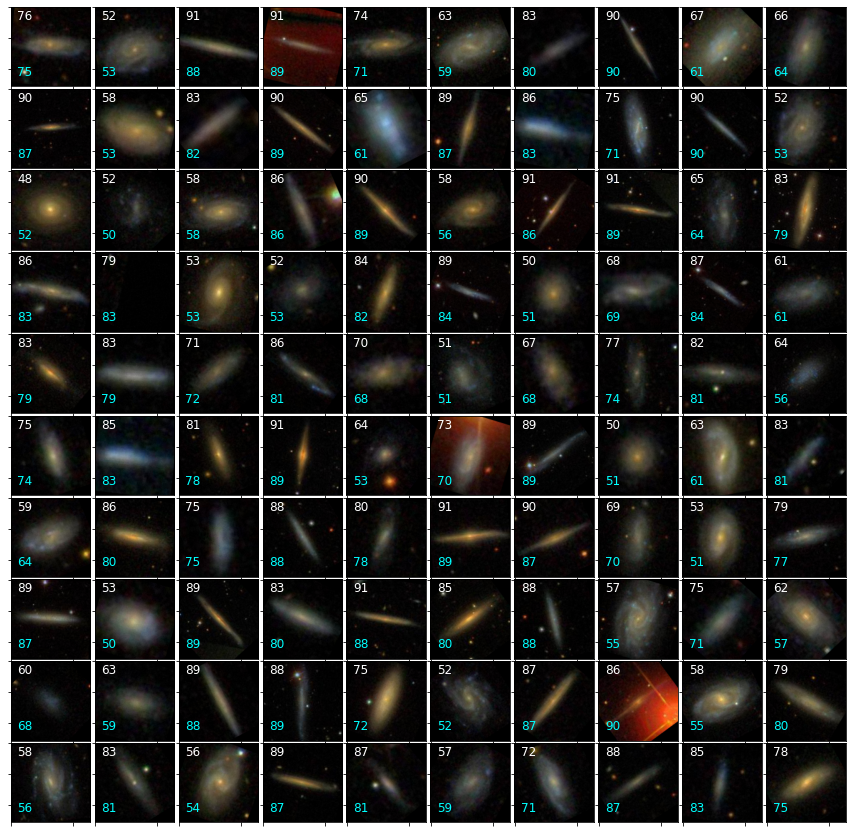

In [70]:
n = 10
m = 10

fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15,15)) 

t = 100 
for i in range(n):
  for j in range(m):

    ax = axes[i][j]
    ax.imshow(images_test_aug[t,:,:])
    
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)

    ax.text(10, 20, np.int(np.round(inc_p[t])), color='white', fontsize=12)
    ax.text(10, 110, np.int(np.round(inc_m[t])), color='cyan', fontsize=12)

    t+=1
  
plt.subplots_adjust(hspace=0.03, wspace=0.03)

Raw RMS:  9.388814408041679
Adjusted RMS:  13.389901732624699


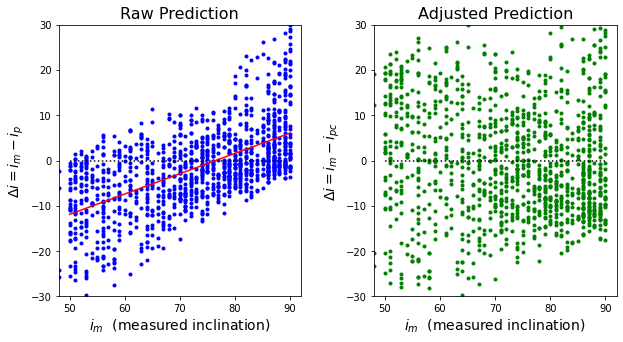

In [138]:
seq = iaa.Sequential([

    iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.1))),
    iaa.GammaContrast(gamma=(0.97,1.03)),
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 3), per_channel=0.5),
    iaa.Add((-5, 5), per_channel=0.5),
    iaa.Multiply((0.8, 1.2), per_channel=0.5),
    iaa.Sometimes(0.1, iaa.Grayscale(alpha=(0.0, 1.0))),
    iaa.Sometimes(0.50, iaa.Grayscale(alpha=1.)),
    iaa.Affine(
        rotate=(0, 359),
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)})
    ], random_order=True)


data = np.load('/content/drive/My Drive/Colab Notebooks/data_128x128_testaug_5.npz')
images_test_aug = data['images'].astype(np.uint8)
labels_test_aug = data['labels']
pgcIDs_test_aug = data['pgcIDs']
data.close() 
del data

vgg_model = vgg6()
vgg_model.load_weights(file_dir+"149.ckpt")

inc_p = vgg_model.predict(seq(images=images_test_aug))
images_test_aug_ = seq(images=images_test_aug)
inc_p = vgg_model.predict(images_test_aug_)
inc_m = labels_test_aug


N = images_test_aug.shape[0]
inc_p = inc_p.reshape(N)


fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(10,5)) 

d = inc_m-inc_p

m, b = np.polyfit(inc_m, d, 1)
x = np.linspace(50,90,20)
y  = m*x+b

ax[0].plot(inc_m, d, 'b.')
ax[0].plot([50,90],[0,0], 'k:')
ax[0].plot(x, y, 'r-')
ax[0].set_xlim(48,92)
ax[0].set_ylim(-30 ,30)
ax[0].set_title('Raw Prediction', fontsize=16)
ax[0].set_xlabel(r'$i_m$'+'  (measured inclination)', fontsize=14)
ax[0].set_ylabel(r'$\Delta i = i_m-i_p$', fontsize=14)

print("Raw RMS: ", np.sqrt(np.mean((d)**2)))


d_ = inc_m-(inc_p+b)/(1.-m)
ax[1].plot(inc_m, d_, 'g.')
ax[1].plot([50,90],[0,0], 'k:')
ax[1].set_xlim(48,92)
ax[1].set_ylim(-30,30)

print("Adjusted RMS: ", np.sqrt(np.mean((d_)**2)))
ax[1].set_title('Adjusted Prediction', fontsize=16)
ax[1].set_xlabel(r'$i_m$'+'  (measured inclination)', fontsize=14)
ax[1].set_ylabel(r'$\Delta i = i_m-i_{pc}$', fontsize=14)

plt.subplots_adjust( wspace=0.3)

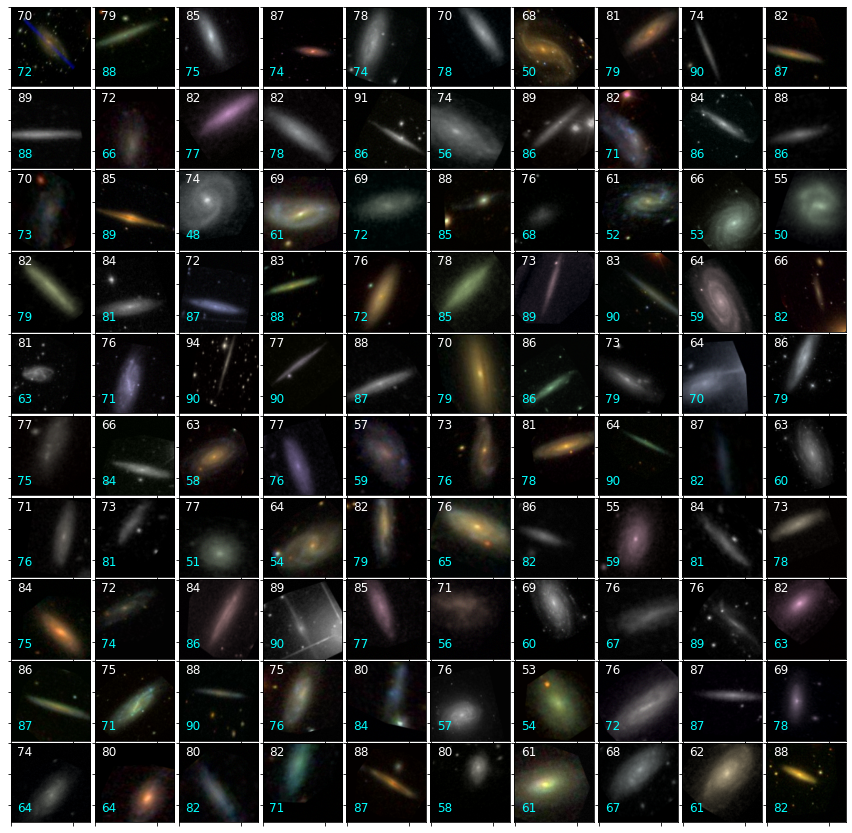

In [139]:
n = 10
m = 10

fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15,15)) 

t = 0 
for i in range(n):
  for j in range(m):

    ax = axes[i][j]
    ax.imshow(images_test_aug_[t,:,:])
    
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)

    ax.text(10, 20, np.int(np.round(inc_p[t])), color='white', fontsize=12)
    ax.text(10, 110, np.int(np.round(inc_m[t])), color='cyan', fontsize=12)

    t+=1
  
plt.subplots_adjust(hspace=0.03, wspace=0.03)